# This notebook is used to process twitter and botometer data to make networks and do analysis on the networks
- This notebook reades in the tweet record data (datetime, user)
- Twitter follower accounts for each BidenCheated Tweet account
- It also reads in the bot scores (user, score)

In [2]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as dates
import matplotlib.ticker as mticker
import numpy as np
import plotly.graph_objects as go

import networkx as nx

#df_final = pd.read_csv("datetTiming.csv")# names=['date', 'time', 'user'])
df_final = pd.read_csv("date_time_tweetTiming.csv", names=['date', 'time', 'username'])

In [3]:
len(df_final)
#df_final['date'] = df_final['date'].str.rstrip(' ED')
#df_final['date']

305780

In [4]:
df_final.head()

,date,time,username
0,2020-12-05,10:56:30,138087
1,2020-12-05,10:56:27,384347
2,2020-12-05,10:56:14,236827
3,2020-12-05,10:56:10,417042
4,2020-12-05,10:55:59,417953


In [5]:
#Formatt the date time in a manageable form
df_final['date'] =  df_final['date'] + " " + df_final['time']
df_final["date"] = df_final["date"].astype("datetime64")



In [6]:
df_final.drop(columns=['time'])

,date,username
0,2020-12-05 10:56:30,138087
1,2020-12-05 10:56:27,384347
2,2020-12-05 10:56:14,236827
3,2020-12-05 10:56:10,417042
4,2020-12-05 10:55:59,417953
...,...,...
305775,2011-05-23 15:33:41,90866
305776,2010-07-18 09:15:02,424528
305777,2009-07-15 10:05:32,515353
305778,2009-01-16 19:55:41,212995


# Plot frequency of records by date
- essentially counting the records from the input file then plotting the count by day

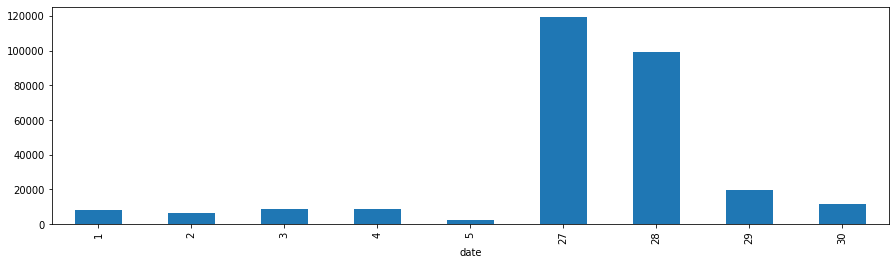

In [7]:

plt.figure(figsize=(15,4))
data = df_final[df_final['date']>='2020-11-27']['date'].groupby(df_final["date"].dt.day).count().plot(kind="bar")
plt.savefig('filename.png')

Lets plot the histogram by hour

<AxesSubplot:>

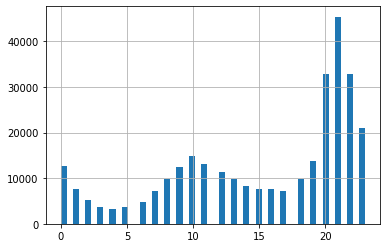

In [8]:
#df_final['date'].dt.hour.hist(bins=50)
df_final['date'].dt.hour.hist(bins=50)

In [9]:
## Cumulative Distribution Function
df_final.drop(columns=['time'])
byhour = df_final[df_final['date']>='2020-11-27']['date'].groupby([df_final["date"].dt.day, df_final["date"].dt.hour]).count()#.plot(kind="bar")
byhour_users = df_final[(df_final['date']>='2020-11-27') & (df_final['date']<='2020-11-29')][['date', 'username']]#.plot(kind="bar")
#dates = df_final['date'].to_numpy()
#users = df_final['user'].to_numpy()

This cell works to process tweets per hour

In [10]:
d_t = [27, 28, 29, 30, 1, 2, 3, 4, 5]
series_time = []
series_label = []
total_count = 0
cumulator = 0
daycount = 0
hourcount = 0
max_tph = {'day': 0, 'hour': 0, 'tph': 0}
for dt in d_t:
    daycount = 1
    hourcount = 0
    for d in byhour[dt]:
        hourcount+=1
        if d > max_tph['tph']:
            max_tph['tph']=d
            max_tph['day']=dt
            max_tph['hour']=hourcount
        cumulator += d
        total_count += 1
        series_time.append(cumulator)        
        series_label.append(str(dt)+"-"+str(daycount))
        #print(str(dt)+"-"+str(daycount), cumulator)
        daycount+=1

In [11]:
print(max_tph, " : average tph = ", (cumulator/total_count))

{'day': 27, 'hour': 22, 'tph': 38991}  : average tph =  1395.8325123152708


# Cumulative tweet record plot
The values for this plot are processed a few cells earlier

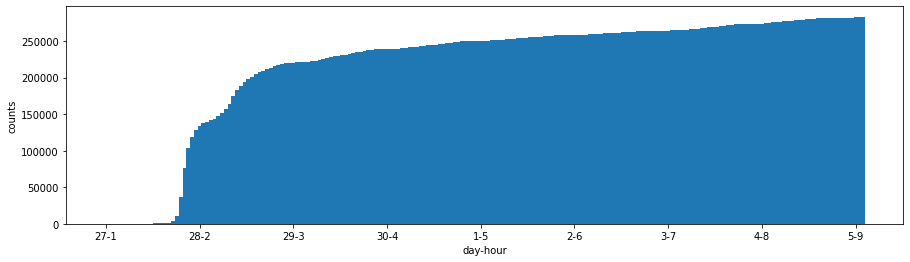

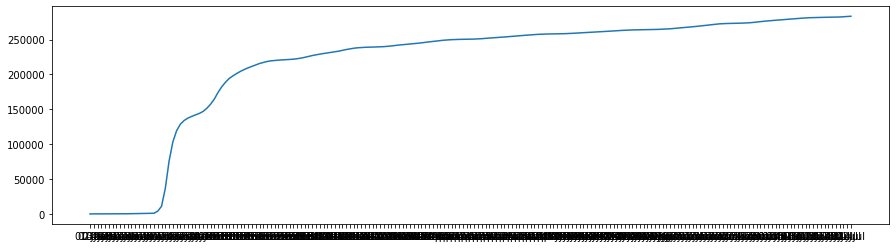

In [12]:


myLocator = mticker.MultipleLocator(25)
fig, ax = plt.subplots(figsize=(15, 4))
ax.xaxis.set_major_locator(myLocator)
ax.set_xlabel("day-hour")
ax.set_ylabel("counts")
ax.bar(series_label, series_time, align='center', width=1)

plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%h'))
plt.plot(series_label, series_time)
#plt.gcf().autofmt_xdate()

In [13]:
# Rate for just day 28
# byhour is dictionary of list of results with key being day
day27_28 = {}
days = [27, 28, 29]
hour = 1
Label_27_28 = []
Series_27_28 = []
users_27_28 = []
for d in days:
    #print(byhour[d])
    for a in byhour[d]:
        day27_28[hour] = a        
        Label_27_28.append(hour)
        Series_27_28.append(a)      
        #users_27_28.append(byhour_users[d])
        hour+=1
        

# Identify the peak timeframe and measure of BidenCheated tweets

In [14]:
## Getting the user names tweeting in each hour

#df_final[(df_final['date']>='2020-11-27') & (df_final['date']<='2020-11-29')]
#t = 1
print(byhour[27])
for t in range(0,24):        
    timeStart = '2020-11-27 0'+str(t)+':00:00'
    
    if t == 23:
        timeEnd = '2020-11-28 00:00:00'            
    else:
        timeEnd = '2020-11-27 0'+str(t+1)+':00:00'    
       
    print(timeStart, timeEnd, len(byhour_users[(byhour_users['date']>=timeStart) & (byhour_users['date']<timeEnd)]))

date
0         7
1         7
2         4
3         3
4         2
5         2
6         3
7         2
8        70
9        50
10       80
11       86
12       81
13       77
14       87
15      119
16       97
17      188
18     3030
19     7041
20    25912
21    38991
22    27256
23    16172
Name: date, dtype: int64
2020-11-27 00:00:00 2020-11-27 01:00:00 7
2020-11-27 01:00:00 2020-11-27 02:00:00 7
2020-11-27 02:00:00 2020-11-27 03:00:00 4
2020-11-27 03:00:00 2020-11-27 04:00:00 3
2020-11-27 04:00:00 2020-11-27 05:00:00 2
2020-11-27 05:00:00 2020-11-27 06:00:00 2
2020-11-27 06:00:00 2020-11-27 07:00:00 3
2020-11-27 07:00:00 2020-11-27 08:00:00 2
2020-11-27 08:00:00 2020-11-27 09:00:00 70
2020-11-27 09:00:00 2020-11-27 010:00:00 50
2020-11-27 010:00:00 2020-11-27 011:00:00 80
2020-11-27 011:00:00 2020-11-27 012:00:00 86
2020-11-27 012:00:00 2020-11-27 013:00:00 81
2020-11-27 013:00:00 2020-11-27 014:00:00 77
2020-11-27 014:00:00 2020-11-27 015:00:00 87
2020-11-27 015:00:00 2020-11-27 01

# Plot of the peak time frame frequency

<Figure size 1080x288 with 0 Axes>

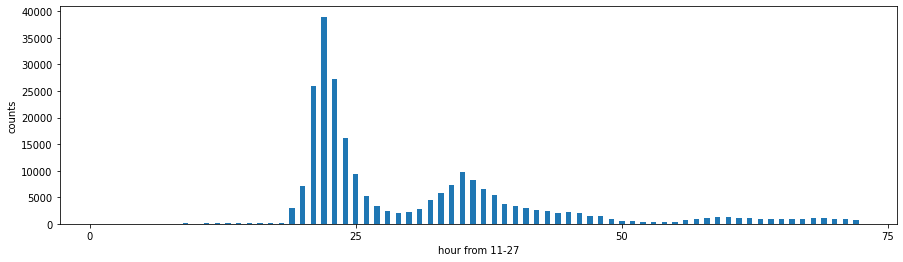

<Figure size 1080x288 with 0 Axes>

In [15]:


myLocator = mticker.MultipleLocator(25)
fig, ax = plt.subplots(figsize=(15, 4))
ax.xaxis.set_major_locator(myLocator)
ax.set_xlabel("hour from 11-27")
ax.set_ylabel("counts")
ax.bar(Label_27_28, Series_27_28, align='center', width=0.5)

plt.figure(figsize=(15,4))
#plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%h'))
#plt.plot(Label_27_28, Series_27_28)

# This cell block reads in the follower data
- Utilize directory structure as
* /followers
  * account_follwers.csv (csv list of accounts that folllow)

In [ ]:
bots = {}
newAccomplices = df_final['username'].unique()
# ID Mapping: [152565, 136371, 215988]
targets_Interest = ['vampirestilez', 'starcisco', 'carlosvaldick']
parents = []
lines = []

for directory, subdirectories, files in os.walk('followers'):
    for file in files:
        if(directory == 'followers'):
            #print(os.path.join(directory, file))
            #if file.split('_')[0] in targets_Interest:
            parents.append(file.split('_')[0])
            file1 = open('followers/'+file, 'r')
            lines.append(file1.readlines())
            file1.close()

completeAccomplices = []
targets_and_accomplices = []

# Gets all users from followers folder
for p in range(0,len(parents)):
    for l in lines[p]:
        completeAccomplices.append(l.split("\n")[0])
print("complete accomplices: ", len(completeAccomplices), " New Accomplices: ", len(newAccomplices))

forgottenUsers = []

# Gets all users from bidencheated tweets
for f in newAccomplices:
    if f not in completeAccomplices:
        completeAccomplices.append(f)
#print(lines[0][0])
#print(newAccomplices[0])
print(len(completeAccomplices))            

complete accomplices:  689568  New Accomplices:  102979


In [ ]:
len()

# Read in bot scores from botometer
- this data is csv of username, botScore

In [ ]:
bots = {}
with open("botometer_scores.csv",'r') as data:
    for line in csv.reader(data):
        bots[line[0]]=float(line[1])
       
           

# Define the master networks
## Networks will be handled as layers where each additional layer is a subgraph of the master network. This allows us to layer subraphs over the master network with different settings
1. Master network
2. Peak hour subgraph
3. Bridge link network subgraph
4. High centrality node network subgraph
5. Nodes determined to be in cliques network subgraph
6. Bots and bridge link network subgraph
7. peak hour subgraph without bots

In [ ]:
def addEdge(twit1, twit2):
    G.add_edge(twit1, twit2)
    
# Create the Master graph
G = nx.Graph()

## For parent and followers
for p in range(0,len(parents)):    
    #if parents[p] in targets_Interest:
    for l in lines[p]:    
        user = l.split("\n")[0]
        #if user in bots:
        addEdge(parents[p], user)   

In [ ]:
print(len(G.nodes), len(G.edges))


In [ ]:
#For master graph
botScores = {}
nodeColors = {}
nodeSizes = {}
user_lables = {}

colorMap = ['black', 'blue', 'green', 'yellow', 'orange', 'red']
sizeMap = [10, 20, 50, 100, 200, 300]
targets_Interest = ['vampirestilez', 'starcisco', 'carlosvaldick', 'redwavewwg1', 'jayesco78']

for n in G.nodes: 
    # Check for bots
    # This is used for Bots, target, 
    if n in bots:
        bs = bots[n]
        bs = int(round(bs))
        botScores[n] = bs
        nodeColors[n] = colorMap[bs]
        nodeSizes[n] = sizeMap[bs]        
        
    else:
        bs = 0
        botScores[n] = bs
        nodeColors[n] = colorMap[bs]
        nodeSizes[n] = sizeMap[bs]

In [ ]:
print(len(G.nodes), len(G.edges))
#pos = nx.spring_layout(G,k=1,iterations=1)
len(bots)
print(targets_Interest)

# Process and plot network by hour
(final network plot is the peak hour)

In [ ]:
# Graph by hour demonstrate the rate

#for t in range(0,24):        
graph_collection = []
edgeColors = ['RGB(193,193,193)', 'RGB(183,183,183)', 'RGB(142,142,142)', 'RGB(132,132,132)', 'RGB(91,91,91)', 'RGB(81,81,81)']

hourly_subgraph = []
hoursub_Colors = {}
hoursub_Sizes = {}
hoursub_Labels = {}
hour_lables = {}
e_color = {}
pos = {}
priorPOS = {}
testedBool = False

for t in targets_Interest:
    hour_lables[t] = t

for t in range(0,24):  
    #hourly_subgraph = []
    used = {}
    timeStart = '2020-11-27 0'+str(t)+':00:00'
    
    if t == 23:
        timeEnd = '2020-11-28 00:00:00'            
    else:
        timeEnd = '2020-11-27 0'+str(t+1)+':00:00'    
        
    hourlyUsers = byhour_users[(byhour_users['date']>=timeStart) & (byhour_users['date']<timeEnd)].to_numpy()
    
    if targets_Interest[0] in hourlyUsers or targets_Interest[1] in hourlyUsers or targets_Interest[2] in hourlyUsers:
        for targ in targets_Interest:
            hourly_subgraph.append(targ)
            hoursub_Colors[targ] = nodeColors[targ]
            hoursub_Sizes[targ] = nodeSizes[targ]
            hoursub_Labels[targ] = targ
        print("play ball")
        for d, u in hourlyUsers:
            if u in G.nodes:            
                hourly_subgraph.append(u)
                hoursub_Colors[u] = nodeColors[u]
                hoursub_Sizes[u] = nodeSizes[u]
                hoursub_Labels[u] = u
                #hour_lables[u] = u
            #else:
                #print("missing ", u)
        
        
        
        G_sub = G.subgraph(hourly_subgraph)
        degreeHourly = []
        hourly_subgraph = []
        hoursub_Colors = {}
        hoursub_Sizes = {}
        hoursub_Labels = {}
        #hour_lables = {}
        for node, val in G_sub.degree():
            if val >= 2 or node in targets_Interest:            
                degreeHourly.append(node)
                hourly_subgraph.append(node)
                hoursub_Colors[node] = nodeColors[node]
                hoursub_Sizes[node] = nodeSizes[node]
                hoursub_Labels[node] = node
                #hour_lables[node] = node
                if val > 500:
                    hour_lables[node] = node


        G_sub = G_sub.subgraph(degreeHourly)
        graph_collection.append(G_sub)
        print(timeStart, timeEnd, len(byhour_users[(byhour_users['date']>=timeStart) & (byhour_users['date']<timeEnd)]), len(hourly_subgraph)) 

        if testedBool:
            for k in degreeHourly:
                if k in priorPOS:
                    used[k] = priorPOS[k]
            #used = {k: priorPOS[k] for k in degreeHourly}
            pos = nx.spring_layout(G_sub, k=1, pos=used, fixed=list(used.keys()), iterations=5)
        else:
            pos = nx.spring_layout(G_sub,k=1, iterations=5)
            testedBool = True

        priorPOS = {**pos, **priorPOS}
        plt.figure(figsize=(20,20))
        nx.draw_networkx(G_sub, pos=pos, labels=hour_lables, node_color=list(hoursub_Colors.values()),edge_color='grey',font_size=20,font_color='b', node_size=list(hoursub_Sizes.values()))
        plt.savefig(timeStart+" hour_graph.png")
    else:
        print("no dice")

# Produce quantitative measure to understand the connectivity properties and efficiency of the peak hour network (last network generated from prior step)

In [ ]:
from scipy import stats
from operator import itemgetter

graph_centrality = nx.degree_centrality(G_sub) #
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(G_sub)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(G_sub, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))
graph_communicable = nx.communicability(G_sub)


Print and report results from the quantitative measures

In [ ]:
print(graph_centrality['starcisco'], max_de)
print(graph_communicable['jayesco78']['redwavewwg1'])
print(graph_communicable['redwavewwg1']['starcisco'])
print(graph_communicable['jayesco78']['starcisco'])
print(graph_communicable['vampirestilez']['starcisco'])

graph_numpy = np.array(list(graph_centrality.values()))
print("Average centrality = ", np.average(graph_numpy), ": Maximum Centrality = ", np.max(graph_numpy))
print("Average closeness = ", np.average(list(graph_closeness.values())), ": Maximum Closeness = ", np.max(list(graph_closeness.values())))
print("Average betweeness = ", np.average(list(graph_betweenness.values())), ": Maximum betweenness = ", np.max(list(graph_betweenness.values())))

In [ ]:
#graph_closeness['jayesco78']
print(max_de, max_clo, max_bet)

In [ ]:
cliques = list(nx.find_cliques(G_sub)) # gives lists of lists of cliques, but most are length 2...
ds = nx.dominating_set(G_sub) # gives a list of dominating nodes large number of connections
bridges = list(nx.bridges(G_sub))

In [ ]:
bri = []
for b in bridges:
    bri.append(b)


print("dominating set = ", len(ds), ": Total set = ", len(G_sub.nodes()), ": number of Bridges = ", len(bri), ": number of Cliques = ", len(list(cliques)))


In [ ]:
cliq = []
for c in cliques:
    cliq.append(c)
    
print(len(cliq), len(cliq[6481]))

In [ ]:
#Cliques 
maxCliq = 0
maxCliqName = 0
cliqArray = []

for i in range(0,len(cliq)):
    if len(cliq[i]) > maxCliq:
        maxCliq = len(cliq[i])
        maxCliqName = i
        
    if len(cliq[i]) > 3:
        cliqArray.append(i)
print(maxCliq, cliq[maxCliqName], len(cliqArray))

for i in cliqArray:
    print(cliq[i])
  


# This section produces all of the other subgraphs that are built on the hour subgraph shown and measured in the prior sections

In [ ]:
bridge_subgraph = []
bridgePOS = {}
bridge_Colors = {}
bridge_Sizes = {}
bridge_labels = {}
for b in bri:    
        for bb in b:
            #if bb == 'redwavewwg1' or bb=='cheeseslave':
            bridge_subgraph.append(bb)
            bridgePOS[bb] = priorPOS[bb]
            bridge_Colors[bb] = nodeColors[bb]
            bridge_Sizes[bb] = nodeSizes[bb]
            bridge_labels[bb] = bb

cent_subgraph = []
centPOS = {}
cent_Colors = {}
cent_Sizes = {}
cent_labels = {}
for g in graph_centrality:
    if graph_centrality[g] > 0.1:
        #print(a, graph_centrality[a])
        cent_subgraph.append(g)
        centPOS[g] = priorPOS[g]
        cent_Colors[g] = nodeColors[g]
        cent_Sizes[g] = nodeSizes[g]
        cent_labels[g] = g

cliq_subgraph = []
cliqPOS = {}
cliq_Colors = {}
cliq_Sizes = {}
cliq_labels = {}
for a in cliqArray:  
    for g in cliq[a]:        
        cliq_subgraph.append(g)
        cliqPOS[g] = priorPOS[g]
        cliq_Colors[g] = nodeColors[g]
        cliq_Sizes[g] = nodeSizes[g]
        cliq_labels[g] = g        
        
bot_subgraph = []
botPOS = {}
bot_Colors = {}
bot_Sizes = {}
bot_labels = {}   

edgeColor = []
alphaEdge = []
for e in G_sub.edges:
    if e[0] in bridge_subgraph and e[1] in bridge_subgraph:
        edgeColor.append('blue')
        alphaEdge.append(0.5)
    else:
        edgeColor.append('grey')
        alphaEdge.append(0.5)
        
    if e[0] in bots:
        if bots[e[0]] >= 4:            
            bot_subgraph.append(e[0])
            botPOS[e[0]] = pos[e[0]]
            bot_Colors[e[0]] = nodeColors[e[0]]
            bot_Sizes[e[0]] = nodeSizes[e[0]]
            bot_labels[e[0]] = e[0]
            bot_subgraph.append(e[1])
            botPOS[e[1]] = pos[e[1]]
            bot_Colors[e[1]] = nodeColors[e[1]]
            bot_Sizes[e[1]] = nodeSizes[e[1]]
            bot_labels[e[1]] = e[1] 
    if e[1] in bots:
        if bots[e[1]] >= 4:
            bot_subgraph.append(e[0])
            botPOS[e[0]] = pos[e[0]]
            bot_Colors[e[0]] = nodeColors[e[0]]
            bot_Sizes[e[0]] = nodeSizes[e[0]]
            bot_labels[e[0]] = e[0]
            bot_subgraph.append(e[1])
            botPOS[e[1]] = pos[e[1]]
            bot_Colors[e[1]] = nodeColors[e[1]]
            bot_Sizes[e[1]] = nodeSizes[e[1]]
            bot_labels[e[1]] = e[1] 
            
        #print(e[0], e[1])
        #if nodeSizes[e[1]] > 200:
        #    bridge_subgraph.append(e[1])
        #    bridgePOS[e[1]] = priorPOS[e[1]]
        #    bridge_Colors[e[1]] = nodeColors[e[1]]
        #    bridge_Sizes[e[1]] = nodeSizes[e[1]]        

nobot_subgraph = []
nobotPOS = {}
nobot_Colors = {}
nobot_Sizes = {}
nobot_labels = {}
for a in G_sub:
    if a not in bots:
        nobot_subgraph.append(a)
        nobotPOS[a] = priorPOS[a]
        nobot_Colors[a] = nodeColors[a]
        nobot_Sizes[a] = nodeSizes[a]
        nobot_labels[a] = a         
    elif bots[a] < 4:
        nobot_subgraph.append(a)
        nobotPOS[a] = priorPOS[a]
        nobot_Colors[a] = nodeColors[a]
        nobot_Sizes[a] = nodeSizes[a]
        nobot_labels[a] = a 
        
gSubSub = G_sub.subgraph(bridge_subgraph)
gCentSub = G_sub.subgraph(cent_subgraph)
gBotSub = G_sub.subgraph(bot_subgraph)
gCliqSub = G_sub.subgraph(cliq_subgraph)
gNoBots = G_sub.subgraph(nobot_subgraph)
print(len(bot_subgraph))#, centPOS)

# For this type of network the Kamada Kawai layout method ended up looking better
## for layering networks we need to make sure we utilize the same positions for each node, this is done using the variables for each subgraph that contain POS (stands for position, not other crude accroym ;p )

In [ ]:
#newpos = nx.spring_layout(G_sub,k=1, iterations=10)
#newpos = nx.spectral_layout(G_sub)
newpos = nx.kamada_kawai_layout(G_sub)

# Plot of highest centrality measured nodes overlayed on top of the peak hour subgraph
- In general for successful network plotting we need to utilize the alpha parameter otherwise we don't see the overlapping segments and nodes
- We draw the base network which is the peak hour subgraph using the alpha parameter to make the nodes and edges transparent
- Then draw the high centrality network using no alpha and colors that make the nodes and edges pop

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=newpos, with_labels=False, node_color=list(hoursub_Colors.values()),edge_color='grey', alpha=0.3,font_size=20,font_color='b', node_size=list(hoursub_Sizes.values()))
nx.draw_networkx(gCentSub, pos=newpos, labels=cent_labels, node_color=list(cent_Colors.values()),edge_color='blue', font_size=18, font_color='b', node_size=list(cent_Sizes.values()))
plt.savefig("centrality_hour_graph.png")

Same approach except we are overlaying the clique measurement network

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=newpos, with_labels=False, node_color=list(hoursub_Colors.values()),edge_color='grey', alpha=0.3,font_size=20,font_color='b', node_size=list(hoursub_Sizes.values()))
nx.draw_networkx(gCliqSub, pos=newpos, labels=hour_lables, node_color=list(cliq_Colors.values()),edge_color='blue', alpha=0.9, font_size=18, font_color='b', node_size=list(cliq_Sizes.values()))
plt.savefig("cliques_hour_graph.png")

Same approach except this time overlaying the bridged nodes network

In [ ]:


plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=newpos, with_labels=False, node_color=list(hoursub_Colors.values()),edge_color=edgeColor, alpha=0.3,font_size=20,font_color='b', node_size=list(hoursub_Sizes.values()))
nx.draw_networkx(gSubSub, pos=newpos, labels=bridge_labels, node_color=list(bridge_Colors.values()),edge_color='blue', font_size=20, font_color='b', node_size=list(bridge_Sizes.values()))
plt.savefig("bridged_hour_graph.png")

Same as last chart except we also overlay the nodes scored 4 or greater from botometer. This network is interesting to be able to see the spatial relationship of the bot nodes and edges (red) to the bridge node and edges (blue)

In [ ]:

plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=newpos, with_labels=False, node_color=list(hoursub_Colors.values()),edge_color='grey', alpha=0.15,font_size=20,font_color='b', node_size=list(hoursub_Sizes.values()))
nx.draw_networkx(gBotSub, pos=newpos, with_labels=False, node_color=list(bot_Colors.values()),edge_color='red', alpha=0.1, font_size=20, font_color='r', node_size=list(bot_Sizes.values()))
nx.draw_networkx(gSubSub, pos=newpos, labels=bridge_labels, node_color=list(bridge_Colors.values()),edge_color='blue', font_size=20, font_color='b', node_size=list(bridge_Sizes.values()))
plt.savefig("bot_bridge_hour_graph.png")

The final plot does not necessarily need to be drawn, this network is more interesting for the quantitative comparison

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(gNoBots, pos=newpos, with_labels=False, node_color=list(nobot_Colors.values()),edge_color='grey', alpha=0.1, font_size=20, font_color='b', node_size=list(nobot_Sizes.values()))
plt.savefig("botless_hour_graph.png")

# Perform the same quantitative measures for the subgraph of the peak hour without bots

In [ ]:
nobot_graph_centrality = nx.degree_centrality(gNoBots) #
nobot_max_de = max(graph_centrality.items(), key=itemgetter(1))
nobot_graph_closeness = nx.closeness_centrality(gNoBots)
nobot_max_clo = max(graph_closeness.items(), key=itemgetter(1))
nobot_graph_betweenness = nx.betweenness_centrality(gNoBots, normalized=True, endpoints=False)
nobot_max_bet = max(graph_betweenness.items(), key=itemgetter(1))
nobot_graph_communicable = nx.communicability(gNoBots)

In [ ]:
nobot_cliques = list(nx.find_cliques(gNoBots)) # gives lists of lists of cliques, but most are length 2...
nobot_ds = nx.dominating_set(gNoBots) # gives a list of dominating nodes large number of connections
nobot_bridges = list(nx.bridges(gNoBots))
nobot_closeness_vitality = nx.closeness_vitality(gNoBots)

In [ ]:
totalComm_score = {}
tot_score = 0
for nb in nobot_graph_communicable:
    for n in nobot_graph_communicable[nb]:
        tot_score += nobot_graph_communicable[nb][n]
    totalComm_score[nb] = tot_score    
        

In [ ]:
#totalComm_score['blubal42']
'starcisco' in gNoBots.nodes()

In [ ]:
nobot_graph_numpy = np.array(list(nobot_graph_centrality.values()))
print("Average centrality = ", np.average(nobot_graph_numpy), ": Maximum Centrality = ", np.max(nobot_graph_numpy))
print("Average closeness = ", np.average(list(nobot_graph_closeness.values())), ": Maximum Closeness = ", np.max(list(nobot_graph_closeness.values())))
print("Average betweeness = ", np.average(list(nobot_graph_betweenness.values())), ": Maximum betweenness = ", np.max(list(nobot_graph_betweenness.values())))

In [ ]:
nobot_bri = []
for b in nobot_bridges:
    nobot_bri.append(b)


print("dominating set = ", len(nobot_ds), ": Total set = ", len(gNoBots.nodes()), ": number of Bridges = ", len(nobot_bri), ": number of Cliques = ", len(list(nobot_cliques)))

In [ ]:
nobot_bridge_subgraph = []
nobot_bridgePOS = {}
nobot_bridge_Colors = {}
nobot_bridge_Sizes = {}
nobot_bridge_labels = {}
for b in nobot_bri:    
        for bb in b:
            #if bb == 'redwavewwg1' or bb=='cheeseslave':
            nobot_bridge_subgraph.append(bb)
            nobot_bridgePOS[bb] = priorPOS[bb]
            nobot_bridge_Colors[bb] = nodeColors[bb]
            nobot_bridge_Sizes[bb] = nodeSizes[bb]
            nobot_bridge_labels[bb] = bb
            
gNoBots_bridge = G_sub.subgraph(nobot_bridge_subgraph)            

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(gNoBots, pos=newpos, with_labels=False, node_color=list(nobot_Colors.values()),edge_color='grey', alpha=0.25, font_size=20, font_color='b', node_size=list(nobot_Sizes.values()))
nx.draw_networkx(gNoBots_bridge, pos=newpos, with_labels=False, node_color=list(nobot_bridge_Colors.values()),edge_color='blue', alpha=0.5, font_size=20, font_color='b', node_size=list(nobot_bridge_Sizes.values()))
plt.savefig("botless_hour_graph.png")

In [ ]:
cumulativePOS={**pos, **priorPOS}
len(cumulativePOS)

In [ ]:
degrees = [val for (node, val) in G_sub.degree()]
highConnect = np.sort(degrees)[::-1]

In [ ]:
highConnect[0:2]

# This section performs more statistical metrics on the rate of tweeting BidenCheated from high Botometer scored users versus low Botometer scored users

In [ ]:
unique_accomplices = df_final['username'].unique()
bots_recorded = 0
for b in bots:
    bots_recorded += 1

print("users scored as Bots for BidenCheated = ", bots_recorded, ": total users = ", len(unique_accomplices), ": percent Bots = ", (bots_recorded/len(unique_accomplices)))

In [ ]:
total_accomplices = df_final['username'].to_numpy()
countAccomplice = {}
botAccomplice = {}
nonBotAccomplice = {}
for u in total_accomplices:
    if u in countAccomplice:
        countAccomplice[u] += 1        
        if u in bots:
            if bots[u] >= 4:
                botAccomplice[u] += 1
            else:
                nonBotAccomplice[u] += 1
    else:
        countAccomplice[u] = 1
        if u in bots: 
            if bots[u] >= 4:
                botAccomplice[u] = 1
            else:
                nonBotAccomplice[u] = 1
print("total BidenCheated Users = ", len(countAccomplice), ": total BidenCheated Bots = ", len(botAccomplice), ": total BidenCheated nonBots = ", len(nonBotAccomplice))

In [ ]:
print(max(botAccomplice.values()), max(nonBotAccomplice.values()))
normalizedBot = []
normLarge_b = []
largestBots = {}
for ba in botAccomplice:    
    if botAccomplice[ba] <=100:
        normalizedBot.append(botAccomplice[ba])
    else:
        normLarge_b.append(botAccomplice[ba])
        largestBots[ba] = botAccomplice[ba]

normalizedUser = []
normLarge_u = []
largestUser = {}
for nb in nonBotAccomplice:    
    if nonBotAccomplice[nb] <=100:
        normalizedUser.append(nonBotAccomplice[nb])
    else:
        normLarge_u.append(nonBotAccomplice[nb])
        largestUser[nb] = nonBotAccomplice[nb]        
        

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel("counts")
ax1.set_xlabel("number of tweets")
plt.hist(np.array(normalizedBot), bins=100)
plt.savefig('accountBotHisto.png')

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel("counts")
ax1.set_xlabel("number of tweets")
plt.hist(np.array(normalizedUser), bins=100)
plt.savefig('accountNonBotHist.png')

print(largestBots)
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel("counts")
ax1.set_xlabel("number of tweets")
plt.hist(np.array(normLarge_b), bins=100)
plt.savefig('accountBotHist_Largest.png')
print("-----------------------------------")
print(largestUser)
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel("counts")
ax1.set_xlabel("number of tweets")
plt.hist(np.array(normLarge_u), bins=100)
plt.savefig('accountNonBotHist_Largest.png')